## Dissertação: Frederico Gome

**Objetivo:** análise gráfica preliminar dos dados

**Autor:** Maria Luiza Campos

**Data:** Julho 2025

### Considerações

Essa é uma análise descritiva inicial. Não analisarei nenhuma correlação aqui, é apenas uma forma de descrever os dados com gráficos para
iniciar a geração de insights e compreender como eles se comportam. 

É comum que esses gráficos sejam reportados no apêndice da sua dissertação porque aqui veremos algumas limitações importantes da sua amostra. 
Então, quando você for escrever sessões como resultado, discussão e conclusão, você possivelmente referenciará esse material (contido em anexo no apêndice).

In [8]:
## Importando pacotes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd']


In [3]:
## Vamos agora puxar a base

dados = pd.read_csv('dado_limpos.csv')

In [13]:
## Vamos começar analisando a variável de ESTADO

## Vamos criar um dataframe pra checar a frequência de processos por estado

# Conta a frequência de processos por estado

tabela_estados = dados['estado'].value_counts().reset_index()
tabela_estados.columns = ['estado', 'quantidade_processos']

# Ordena do mais frequente para o menos frequente

tabela_estados = tabela_estados.sort_values(by='quantidade_processos', ascending=False)

print(tabela_estados)

## Minas Gerais domina na amostra, com 30 processos no total. 

   estado  quantidade_processos
0      MG                    30
1      SP                    18
2      MS                    13
3      SC                    11
4      GO                     8
5      RS                     8
6      TO                     7
7      SE                     5
8      ES                     5
12     RO                     3
11     MT                     3
10     DF                     3
9      PR                     3
13     RN                     2
14     PI                     2
15     RJ                     2
16     CE                     2
17     RR                     2
18     AC                     1
19     AM                     1
20     AL                     1
21     MA                     1
22     PA                     1


In [14]:
## Vamos gerar um gráfico de análise: ajustes iniciais

## dicionário de macrorregiões

mapa_regioes = {
    'MG': 'Sudeste', 'SP': 'Sudeste', 'RJ': 'Sudeste', 'ES': 'Sudeste',
    'RS': 'Sul', 'SC': 'Sul', 'PR': 'Sul',
    'MS': 'Centro-Oeste', 'MT': 'Centro-Oeste', 'GO': 'Centro-Oeste', 'DF': 'Centro-Oeste',
    'AL': 'Nordeste', 'BA': 'Nordeste', 'CE': 'Nordeste', 'MA': 'Nordeste',
    'PB': 'Nordeste', 'PE': 'Nordeste', 'PI': 'Nordeste', 'RN': 'Nordeste', 'SE': 'Nordeste',
    'AC': 'Norte', 'AM': 'Norte', 'AP': 'Norte', 'PA': 'Norte',
    'RO': 'Norte', 'RR': 'Norte', 'TO': 'Norte'
}

# criando uma coluna no dataset para a macrorregião 

dados['macrorregiao'] = dados['estado'].map(mapa_regioes).fillna('Não identificado')

   macrorregiao  quantidade_processos
0       Sudeste                    55
1  Centro-Oeste                    27
2           Sul                    22
3         Norte                    15
4      Nordeste                    13


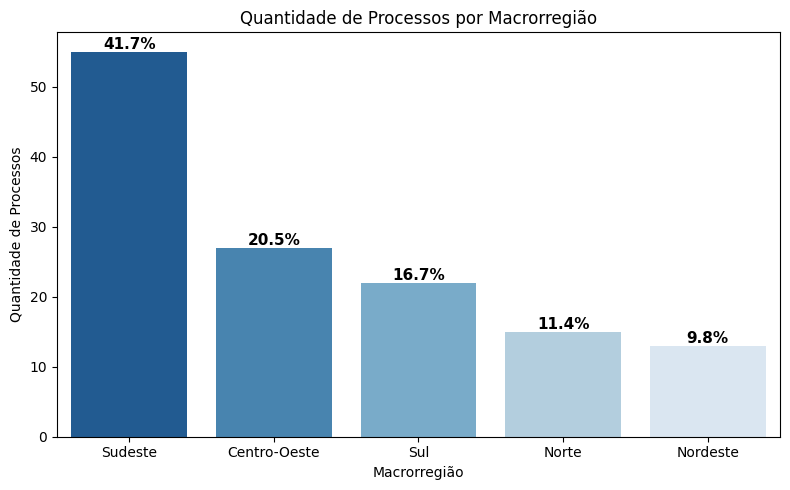

In [ ]:
### GRÁFICO 1: PROCESSO POR ESTADO

## contando a frequência de processos por macrorregião

tabela_regioes = dados['macrorregiao'].value_counts().reset_index()
tabela_regioes.columns = ['macrorregiao', 'quantidade_processos']
tabela_regioes = tabela_regioes.sort_values(by='quantidade_processos', ascending=False)
print(tabela_regioes)

## Usando seaborn

plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=tabela_regioes,
    x='macrorregiao',
    y='quantidade_processos',
    hue='macrorregiao',
    palette='Blues_r',
    legend=False
)
# Adiciona o percentual em cada barra
total = tabela_regioes['quantidade_processos'].sum()
for p in ax.patches:
    valor = int(p.get_height())
    percentual = 100 * valor / total
    ax.annotate(f'{percentual:.1f}%', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=11, fontweight='bold')
    
plt.title('Quantidade de Processos por Macrorregião')
plt.xlabel('Macrorregião')
plt.ylabel('Quantidade de Processos')
plt.tight_layout()
plt.show()


A maior parte dos processos estão no Sudeste (41.7% da amostra está no Sudeste), o que é esperado. O sudeste é onde há maior probabilidade de notificação desse tipo de crime, dado que é a macrorregião mais socioeconomicamente desenvolvida do país. Adicionar qualquer controle regional não vale a pena porque esses dados não refletem, de fato, a frequência de processos por macrorregião. Eles refletem desigualdade regional na notificação. 

Exemplo: o nordeste deve ter mais casos subnotificados que o sudeste. Mas, nessa amostra, o sudeste parece ter mais frequência de casos.

Sugestão de aprimoramento: é possível fazer um gráfico situando os processos no mapa do Brasil, se você achar interessante essa informação, me avise. 

/var/folders/19/fl7mdk7d6bs0hjb2wl3v43pm0000gn/T/ipykernel_46123/249941969.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


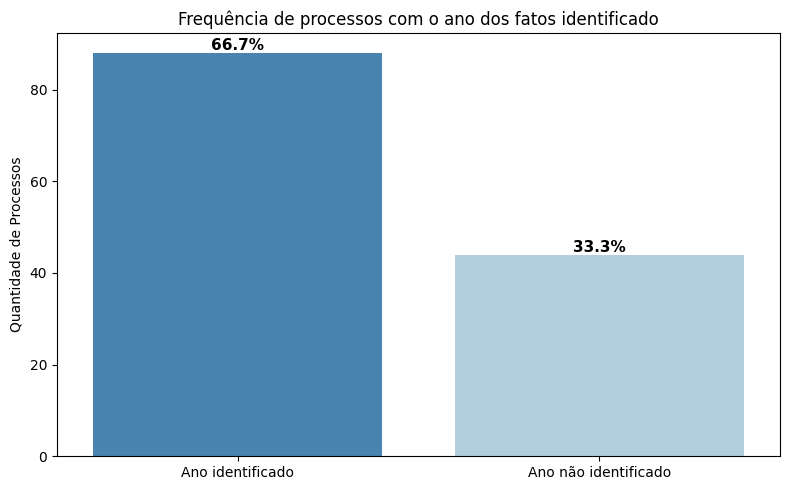

In [ ]:
## GRÁFICO 2: QUANTIDADE DE PROCESSOS COM ANO DOS FATOS IDENTIFICADO

## Vamos criar uma coluna categórica

dados['ano_fatos_cat'] = dados['ano_fatos'].apply(
    lambda x: 'Ano não identificado' if str(x).strip().lower() == 'não informado' else 'Ano identificado'
)

## contando a frequência de cada categoria

tabela_ano = dados['ano_fatos_cat'].value_counts().reset_index()
tabela_ano.columns = ['categoria', 'quantidade']

## Plotando o gráfico

plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=tabela_ano,
    x='categoria',
    y='quantidade',
    palette='Blues_r'
)

# Adiciona o percentual em cada barra
total = tabela_ano['quantidade'].sum()
for p in ax.patches:
    valor = int(p.get_height())
    percentual = 100 * valor / total
    ax.annotate(f'{percentual:.1f}%', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title('Frequência de processos com o ano dos fatos identificado')
plt.xlabel('')
plt.ylabel('Quantidade de Processos')
plt.tight_layout()
plt.show()




Essa informação é pouco relevante a não ser que você tenha conhecimento específico da área do direito, exemplo:
- Esses números são esperados pra esse tipo de caso em específico?

Não saberia dizer se essa informação é ou não é importante do ponto de vista jurídico. 

/var/folders/19/fl7mdk7d6bs0hjb2wl3v43pm0000gn/T/ipykernel_46123/3218337089.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


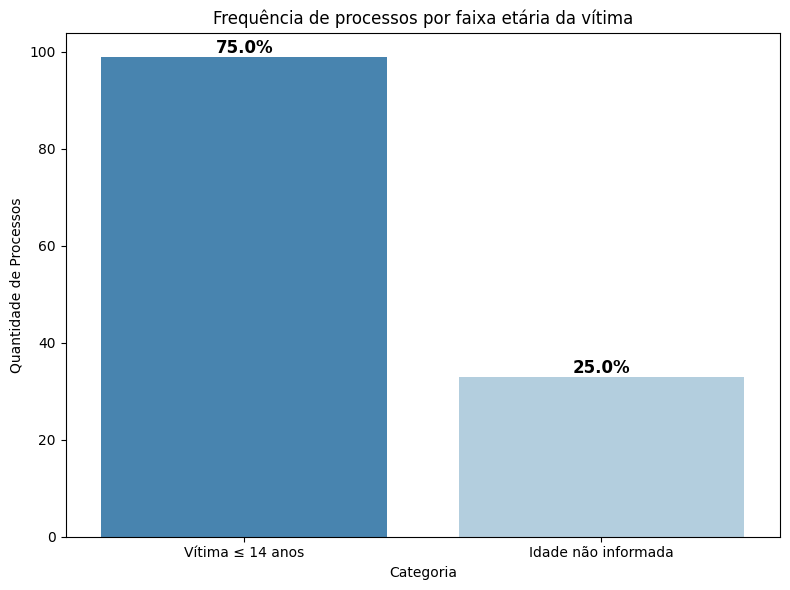

In [28]:
### GRÁFICO 3: QUANTIDADE DE PROCESSOS POR IDADE DA VÍTIMA

# Conta a frequência dos valores, incluindo NaN
contagem_vitima = dados['faixa_etaria_vitima'].value_counts(dropna=False).sort_index()

# Cria as labels personalizadas
labels = []
for idx in contagem.index:
    if pd.isna(idx):
        labels.append('Idade não informada')
    elif idx == 0.0:
        labels.append('Vítima ≤ 14 anos')

plt.figure(figsize=(8,6))
ax = sns.barplot(
    x=labels,
    y=contagem.values,
    palette='Blues_r'
)

# Adiciona o percentual em cada barra
total = contagem.sum()
for i, p in enumerate(ax.patches):
    valor = int(p.get_height())
    percentual = 100 * valor / total
    ax.annotate(f'{percentual:.1f}%', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Frequência de processos por faixa etária da vítima')
plt.xlabel('Categoria')
plt.ylabel('Quantidade de Processos')
plt.tight_layout()
plt.show()

A sua amostra não consta com nenhum processo em que a idade da vítima era maior que 14 anos. 

/var/folders/19/fl7mdk7d6bs0hjb2wl3v43pm0000gn/T/ipykernel_46123/2301961984.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


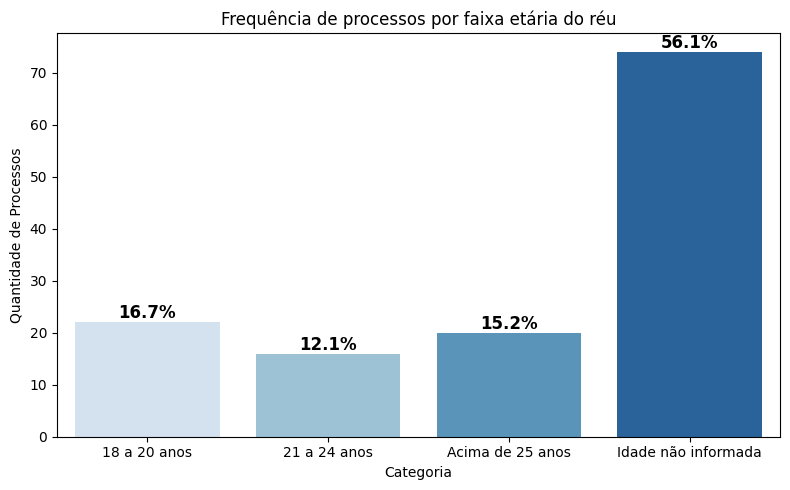

In [ ]:
## GRÁFICO 4: QUANTIDADE DE PROCESSOS POR IDADE DO RÉU

# Conta a frequência dos valores, incluindo NaN
contagem_reu = dados['faixa_etaria_reu'].value_counts(dropna=False).sort_index()

# Cria as labels personalizadas
labels = []
for idx in contagem_reu.index:
    if pd.isna(idx):
        labels.append('Idade não informada')
    elif idx == 0.0:
        labels.append('18 a 20 anos')
    elif idx == 1.0:
        labels.append('21 a 24 anos')
    elif idx == 2.0:
        labels.append('Acima de 25 anos')

plt.figure(figsize=(8,5))
ax = sns.barplot(
    x=labels,
    y=contagem_reu.values,
    palette='Blues'
)

# Adiciona o percentual em cada barra
total = contagem_reu.sum()
for i, p in enumerate(ax.patches):
    valor = int(p.get_height())
    percentual = 100 * valor / total
    ax.annotate(f'{percentual:.1f}%', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Frequência de processos por faixa etária do réu')
plt.xlabel('Categoria')
plt.ylabel('Quantidade de Processos')
plt.tight_layout()
plt.show()

/var/folders/19/fl7mdk7d6bs0hjb2wl3v43pm0000gn/T/ipykernel_46123/2134681651.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/19/fl7mdk7d6bs0hjb2wl3v43pm0000gn/T/ipykernel_46123/2134681651.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


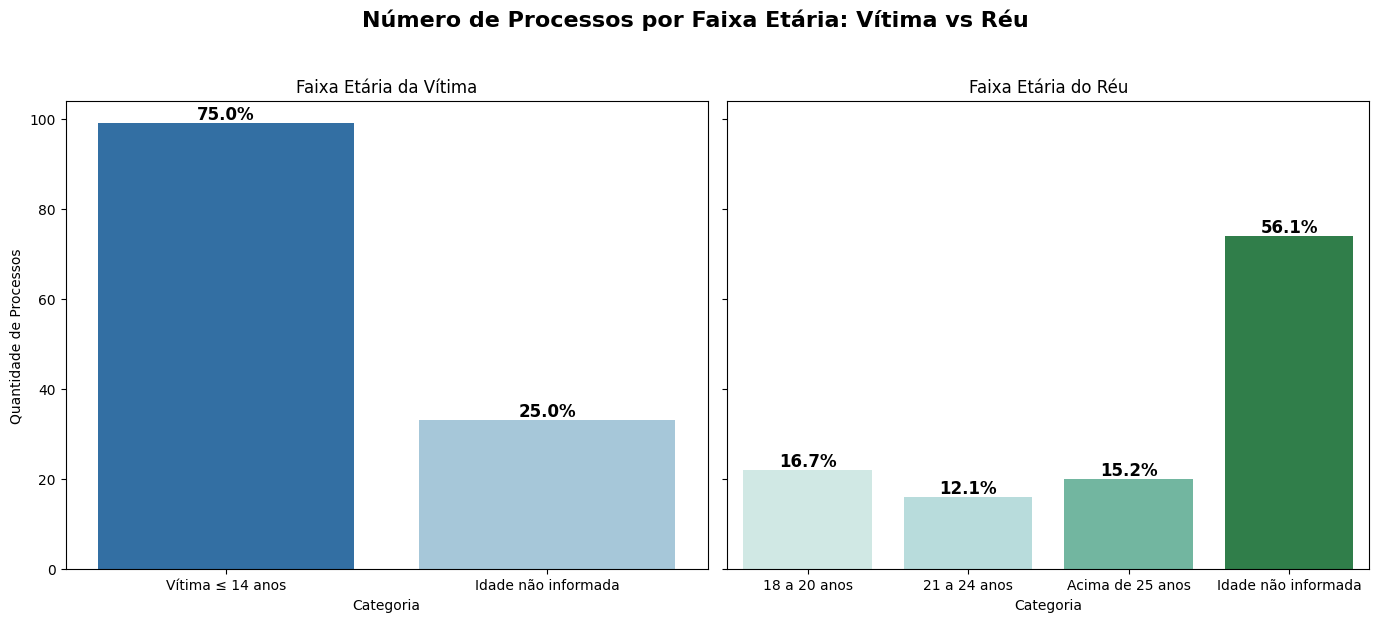

In [35]:
## GRÁFICO 5: NÚMERO DE PROCESSOS POR FAIXA ETÁRIA: VÍTIMA VS RÉU

## Vamos criar uma dash pra comparar ambos os gráficos acima

# --- Gráfico da vítima ---
contagem_vitima = dados['faixa_etaria_vitima'].value_counts(dropna=False).sort_index()
labels_vitima = []
for idx in contagem_vitima.index:
    if pd.isna(idx):
        labels_vitima.append('Idade não informada')
    elif idx == 0.0:
        labels_vitima.append('Vítima ≤ 14 anos')

# --- Gráfico do réu ---
contagem_reu = dados['faixa_etaria_reu'].value_counts(dropna=False).sort_index()
labels_reu = []
for idx in contagem_reu.index:
    if pd.isna(idx):
        labels_reu.append('Idade não informada')
    elif idx == 0.0:
        labels_reu.append('18 a 20 anos')
    elif idx == 1.0:
        labels_reu.append('21 a 24 anos')
    elif idx == 2.0:
        labels_reu.append('Acima de 25 anos')

# --- Cria o dashboard ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Gráfico da vítima (azul)
sns.barplot(
    x=labels_vitima,
    y=contagem_vitima.values,
    palette=['#2171b5', '#9ecae1'],
    ax=axes[0]
)
total_vitima = contagem_vitima.sum()
for i, p in enumerate(axes[0].patches):
    valor = int(p.get_height())
    percentual = 100 * valor / total_vitima
    axes[0].annotate(f'{percentual:.1f}%', 
                     (p.get_x() + p.get_width() / 2, p.get_height()), 
                     ha='center', va='bottom', fontsize=12, fontweight='bold')
axes[0].set_title('Faixa Etária da Vítima')
axes[0].set_xlabel('Categoria')
axes[0].set_ylabel('Quantidade de Processos')

# Gráfico do réu (verde)
sns.barplot(
    x=labels_reu,
    y=contagem_reu.values,
    palette=['#ccece6', '#b2e2e2', '#66c2a4', '#238b45'],
    ax=axes[1]
)
total_reu = contagem_reu.sum()
for i, p in enumerate(axes[1].patches):
    valor = int(p.get_height())
    percentual = 100 * valor / total_reu
    axes[1].annotate(f'{percentual:.1f}%', 
                     (p.get_x() + p.get_width() / 2, p.get_height()), 
                     ha='center', va='bottom', fontsize=12, fontweight='bold')
axes[1].set_title('Faixa Etária do Réu')
axes[1].set_xlabel('Categoria')
axes[1].set_ylabel('')
plt.suptitle('Número de Processos por Faixa Etária: Vítima vs Réu', fontsize=16, fontweight='bold', y=1.03)

plt.tight_layout()
plt.show()